Expliquer l'utilité du notebook   
Pb

# Import packages and set seed

expliquer les packages, à quoi ils servent   
pk mettre seed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import random as rd

from sklearn.neural_network import MLPClassifier
rd.seed(9)

# Import datasets

expliquer origine des datasets, caractéristiques   
pk 2

In [2]:
dataset=pd.read_csv(f"./data/dataset_999_cases_20_percent_broken.csv")
testset=pd.read_csv(f"./data/test_set_1000_cases_20_percent_broken.csv")

# Clear and create datasets

Both datasets have a column named "Unnamed: 0" that represents the lines. As it is useless we drop it.

In [3]:
dataset=dataset.drop("Unnamed: 0", axis='columns')
testset=testset.drop("Unnamed: 0", axis='columns')

We create the training sets: Xtrain (the data that the neural network will use to learn and determine how to predict a class when we give it data) and ytrain (the classes of the data).   
Working contains the classes so we drop it for Xtrain, and we keep it for ytrain while dropping all others columns.   
We centralize the values of Xtrain by columns and keep the values of its mean and its standard deviation.

In [16]:
Xtrain = dataset.drop("working", axis="columns")
Xmean = Xtrain.mean()
Xstd = Xtrain.std()
Xtrain = (Xtrain-Xmean)/Xstd
Xtrain = Xtrain.fillna(0.)
ytrain = dataset.drop(["T_cpu", "fan.T_air", "fan.tension"], axis="columns")   
# We then make numpy array from Xtrain and ytrain.
Xtrain = Xtrain.to_numpy()
ytrain = ytrain.to_numpy().ravel()

We create the test sets: Xtest (the data that the neural network will use to predict a class) and ytest (the classes of the test data we want to determine).   
We drop the columns the same way we did for Xtrain and ytrain.   
We also centralize the values of Xtest with the mean and standard deviation of **Xtrain**, not Xtest.   
We then make numpy array from Xtest and ytest.

In [17]:
Xtest = testset.drop("working", axis="columns")
ytest = testset.drop(["T_cpu", "fan.T_air", "fan.tension"], axis="columns")
Xtest = (Xtest - Xmean) / Xstd
Xtest = Xtest.fillna(0)
Xtest = Xtest.to_numpy()
ytest = ytest.to_numpy().ravel()

# Create and train the neural network

expliquer les paramètres, mettre des exemples, illustrations, mettre un résumé de ce qu'il se passe lors des itérations.

In [19]:
neuralNetwork = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 10, 10, 10), random_state=1, verbose=False, shuffle=True)
neuralNetwork.fit(Xtrain, ytrain)

C:\Users\cyd-d\micromamba\envs\stage\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10, 10), random_state=1,
              solver='sgd')

# Data study

Predicting the class of the data from Xtest and collecting the probabilities for each class.

On va étudier, ce que va faire ce truc là, expliquer les variables

Mettre des noms plus cohérents   
y_prediction=neuralNetwork.predict(Xtest)   
y_prediction_probas=neuralNetwork.predict_proba(Xtest)

In [25]:
resultTest=neuralNetwork.predict(Xtest)
probas=neuralNetwork.predict_proba(Xtest)

In [26]:
probas

array([[9.75104916e-01, 2.48950844e-02],
       [1.84188797e-04, 9.99815811e-01],
       [9.75039198e-01, 2.49608019e-02],
       ...,
       [6.96924777e-02, 9.30307522e-01],
       [9.79931153e-01, 2.00688469e-02],
       [6.97253639e-02, 9.30274636e-01]])

Creation of mask allowing us to check the class of the data.

In [35]:
maskNoProblem=testset["working"]==True
maskBroken=testset["working"]==False

Creation of a function to display various statistics: median, mean, standard deviation, minimum and maximum.

We check the percentage of right answers of our model: one way to check if it works or not. We do not know if it is at 50.1% or 100%.

In [39]:
("Percentage of right guesses:", neuralNetwork.score(Xtest, ytest)*100)

('Percentage of right guesses:', 100.0)

In [36]:
def compute_stats(arr):
    return dict(median=np.median(arr)*100, mean=np.mean(arr)*100, std=np.std(arr)*100, min=np.min(arr)*100, max=np.max(arr)*100)

In [37]:
compute_stats(probas[maskBroken][:,0])

{'median': 98.11012476517628,
 'mean': 97.20487798274992,
 'std': 1.6488032493468112,
 'min': 93.05218652174045,
 'max': 98.92030697164387}

In [38]:
compute_stats(probas[maskNoProblem][:,1])

{'median': 99.81855253950354,
 'mean': 98.56468777442228,
 'std': 2.661736570501551,
 'min': 92.12633772343817,
 'max': 99.98158112028251}

We plot probability(Temp).   
That is the probability given by the neural network to the right class for each point we gave him in the test set.

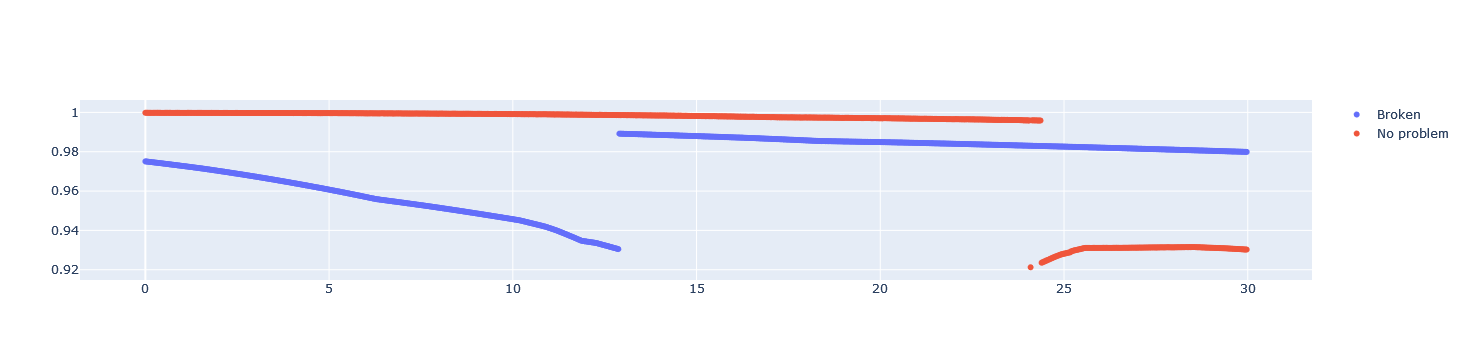

In [40]:
df = pd.DataFrame({"Broken":probas[maskBroken][:,0], "No problem":probas[maskNoProblem][:,1],"Temp":testset[maskNoProblem]["fan.T_air"]})
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df["Temp"], y=df["Broken"], mode='markers', name="Broken")))
fig.add_trace(go.Scatter(go.Scatter(x=df["Temp"], y=df["No problem"], mode='markers', name="No problem")))
fig.show()

rajouter les unités

Boxplots of probability

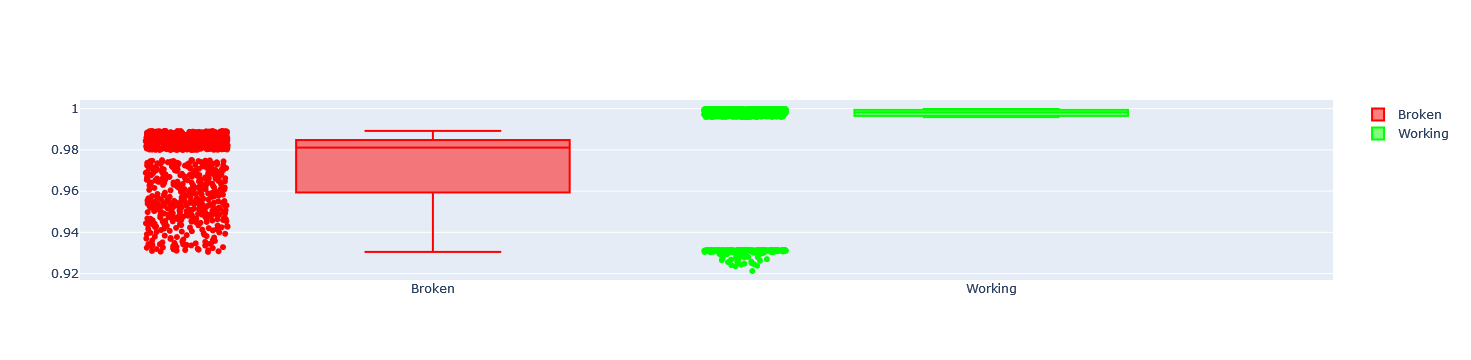

In [42]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=probas[maskBroken][:,0],
    name="Broken",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(255, 0, 0)',
    line_color='rgb(255, 0, 0)'
))
fig.add_trace(go.Box(
    y=probas[maskNoProblem][:,1],
    name="Working",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(0, 255, 0)',
    line_color='rgb(0, 255, 0)'
))

rajouter diagrammes en barres nb(probas), beans